In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## - Import data into Python environment.

comcast_df=pd.read_csv("D:\Data Science\Data Science with Python\PYTHON PROJECT\Comcast Telecom Consumer Complaints\Comcast_telecom_complaints_data.csv")

In [3]:
comcast_df.head(3)  ##  data view

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [4]:
comcast_df.describe()  ## Discribtion

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


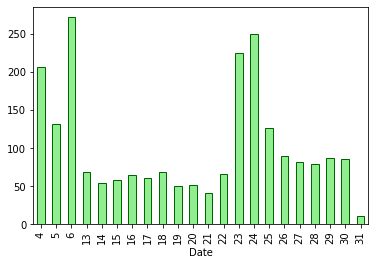

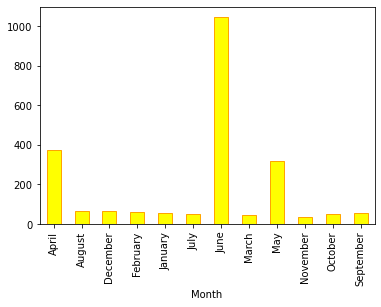

In [5]:
## - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

comcast_df['Month']=pd.to_datetime(comcast_df['Date_month_year']).dt.month_name()
comcast_df['Date']=pd.to_datetime(comcast_df['Date_month_year']).dt.day

## Graph for date wise
comcast_df.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar',color="lightgreen",edgecolor="darkgreen",)
plt.show()

## Graph for month wise
comcast_df.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar',color="yellow",edgecolor="orange")
plt.show()

In [6]:
## - Provide a table with the frequency of complaint types.

comcast_df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,BAIT and SWITCH Product Offerings for Internet...,1
1837,Unfair Comcast Bill,1
1838,Throttling service and unreasonable data caps,1
1839,Comcast Costs,1


In [7]:
## - Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


comcast_df['Customer Complaint'].value_counts().head(5)

Comcast              83
Comcast Internet     18
Comcast Data Cap     17
comcast              13
Comcast Data Caps    11
Name: Customer Complaint, dtype: int64

In [8]:
## - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and 
## Closed & Solved is to be categorized as Closed.

comcast_df['Status']=comcast_df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

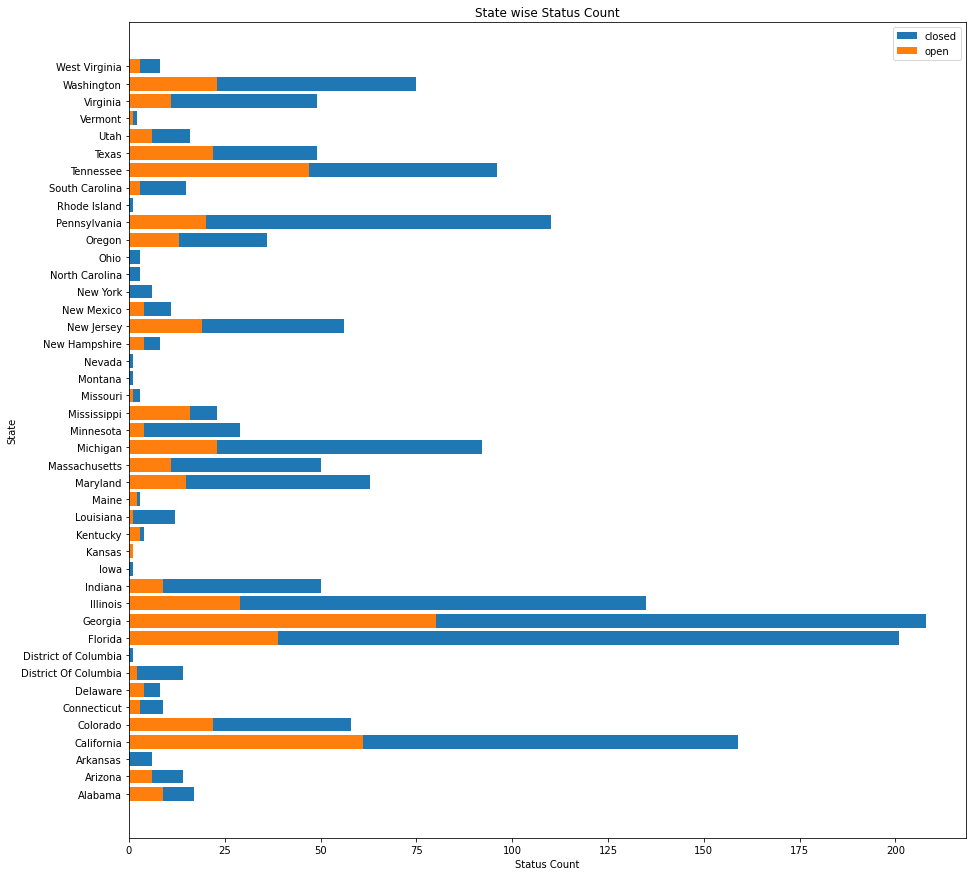

In [9]:
## - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
opn=comcast_df[comcast_df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
clos=comcast_df[comcast_df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(15,15))
plt.barh(clos.State, clos.Status)
plt.barh(opn.State, opn.Status)
plt.ylabel("State")
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("State wise Status Count")

plt.show()


In [10]:
## Which state has the maximum complaints

comcast_df.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

In [11]:
## Which state has the highest percentage of unresolved complaints

State_Unsolved=comcast_df.loc[comcast_df['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State  
Georgia    15.473888
dtype: float64

In [12]:
comcast_df[comcast_df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100


Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64

In [13]:
## Thank you